Resizing Masks: 100%|██████████| 48/48 [00:00<00:00, 128.28it/s]



 (768, 1024, 3) -> (192, 256, 3)


Generating Pieces: 48it [00:00, 1489.36it/s]


Inserted piece 44


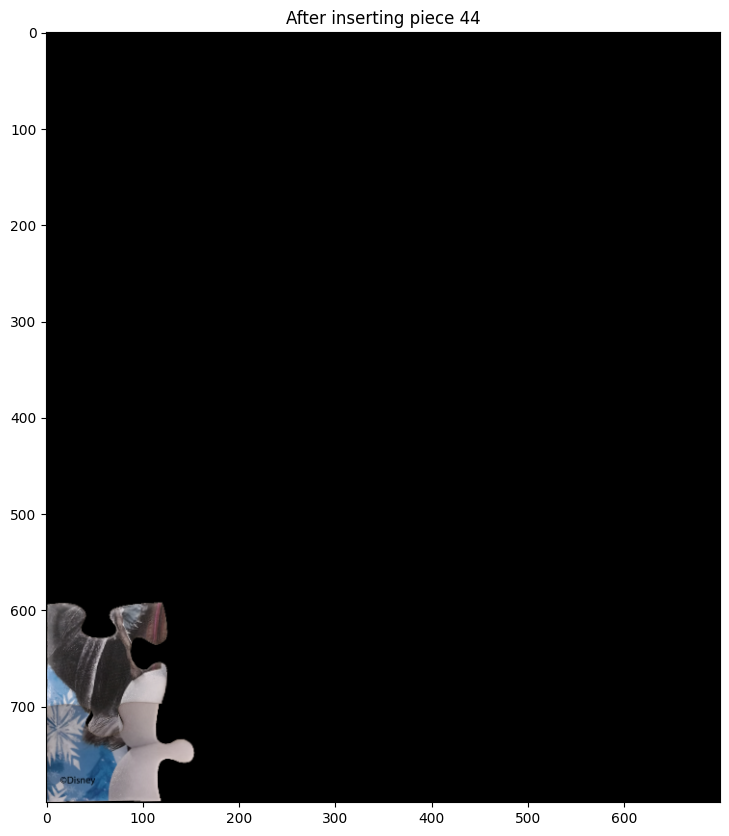

Inserted piece 6


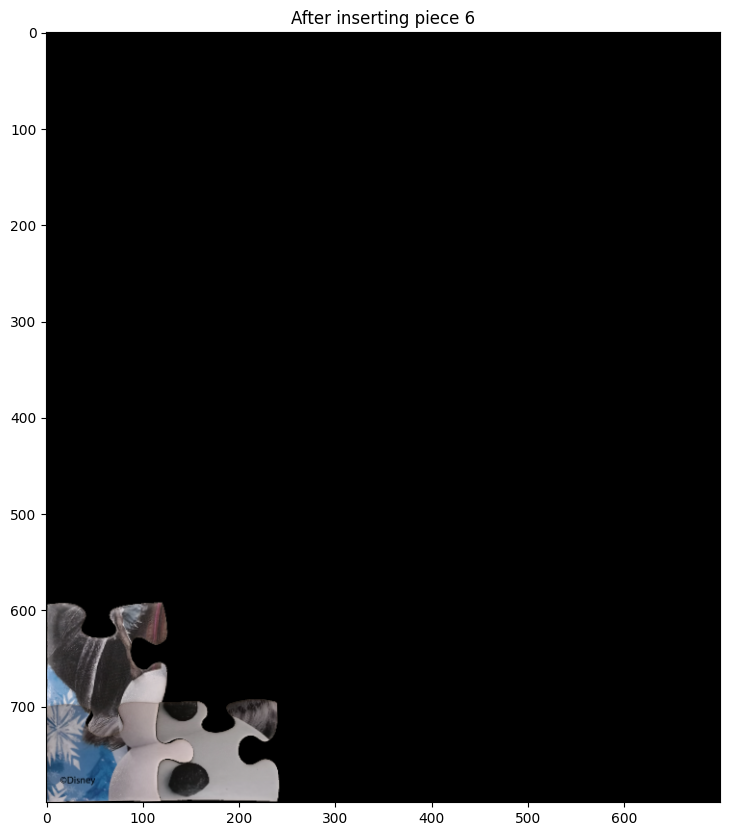

Inserted piece 37


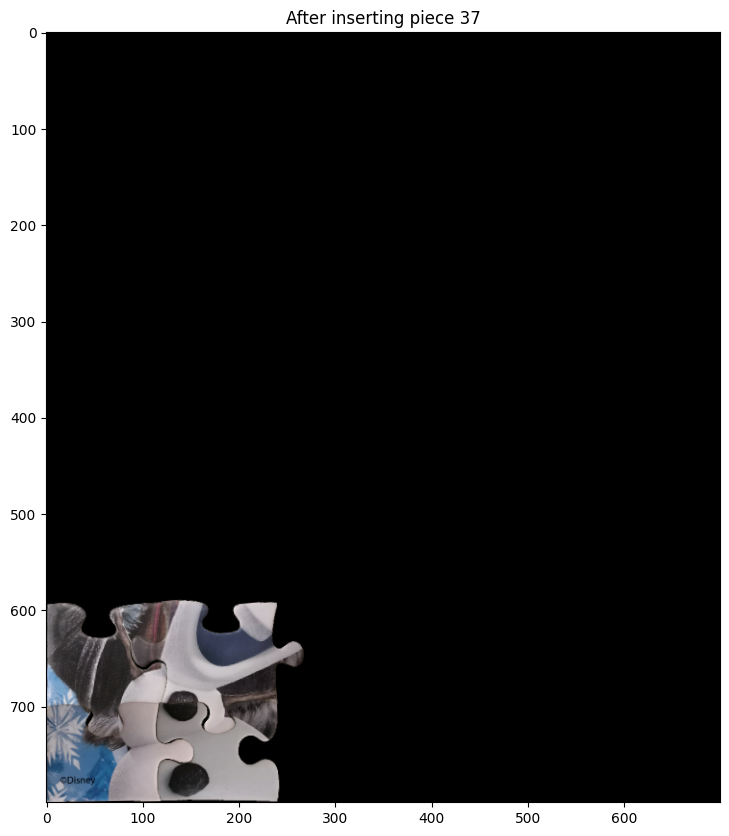

Inserted piece 31


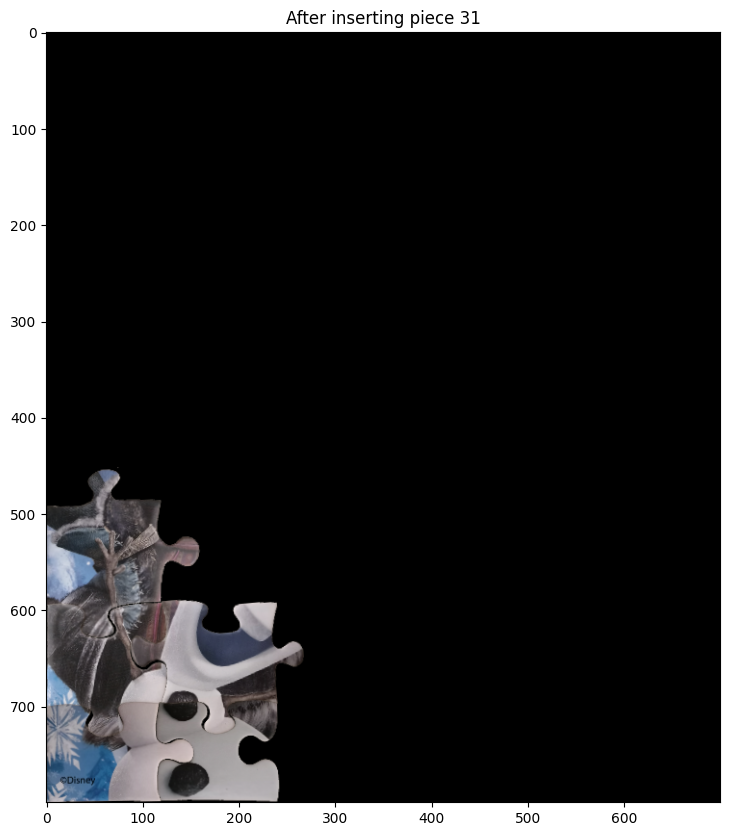

Inserted piece 32


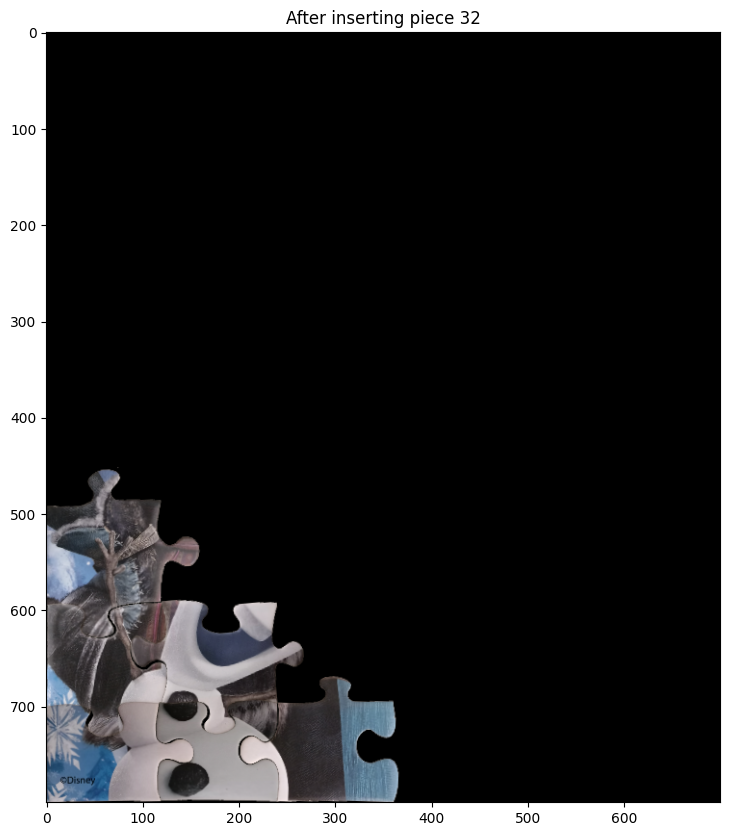

Inserted piece 17
Inserted piece 23
Inserted piece 10
Inserted piece 39
Inserted piece 43
Inserted piece 20
Inserted piece 11
Inserted piece 33
Inserted piece 46
Inserted piece 36
Inserted piece 27
Inserted piece 40
Inserted piece 19
Inserted piece 16
Inserted piece 8
Inserted piece 13
Inserted piece 35
Inserted piece 30
Inserted piece 15
Inserted piece 2
Inserted piece 26
Inserted piece 22
Inserted piece 25
Inserted piece 12
Inserted piece 14
Inserted piece 7
Inserted piece 0
Inserted piece 1
Inserted piece 45
Inserted piece 9
Inserted piece 41
Inserted piece 5
Inserted piece 29
Inserted piece 47
Inserted piece 28
Inserted piece 4
Inserted piece 42
Inserted piece 38


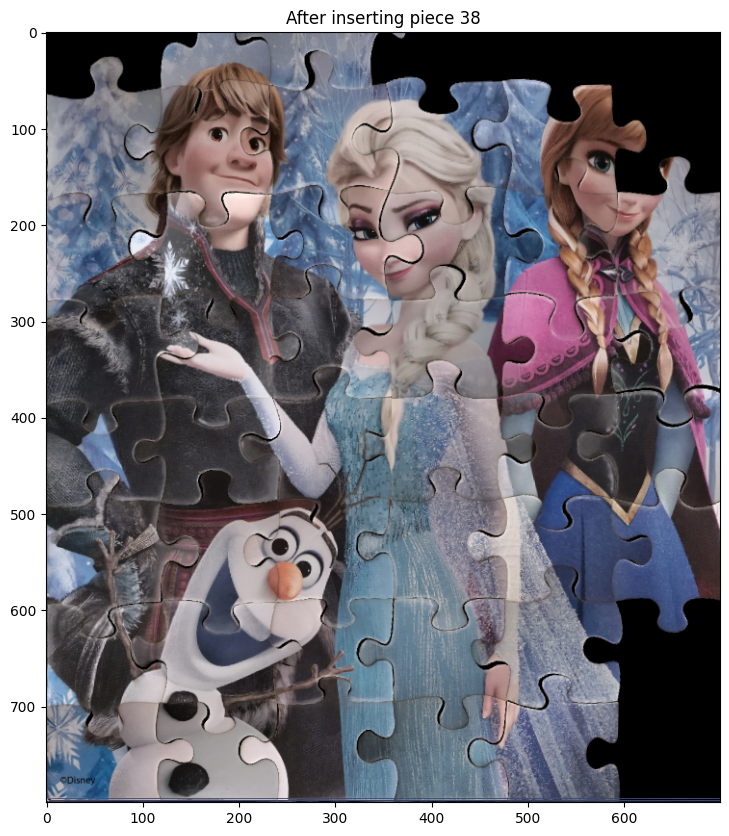

Inserted piece 34


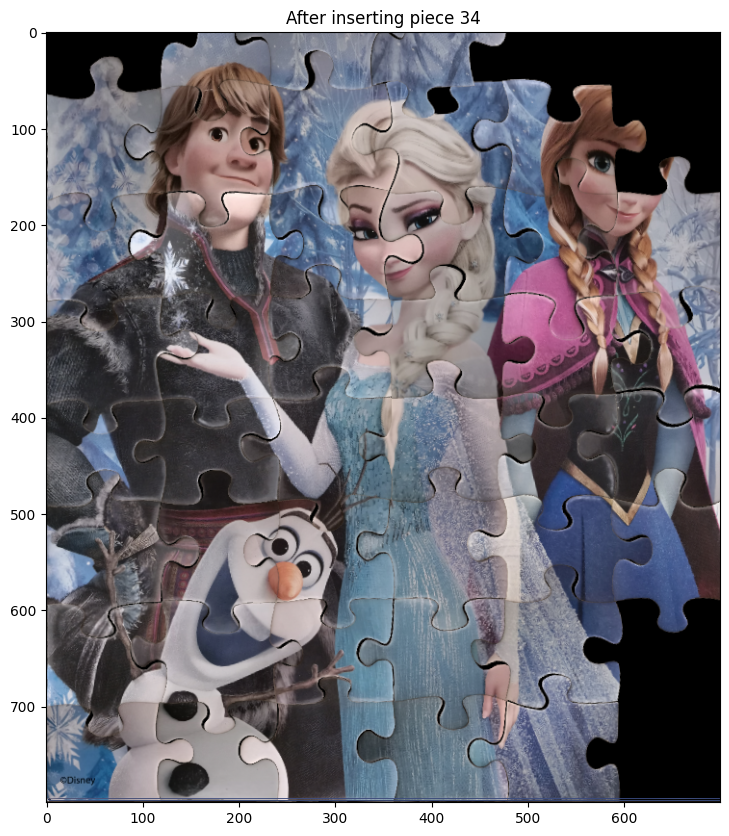

Inserted piece 24


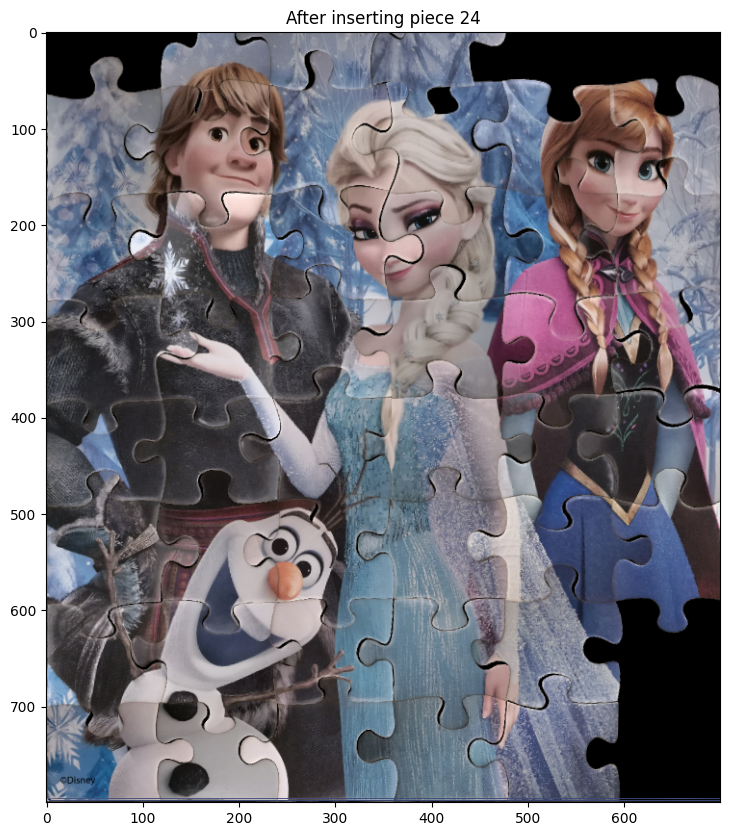

Inserted piece 18


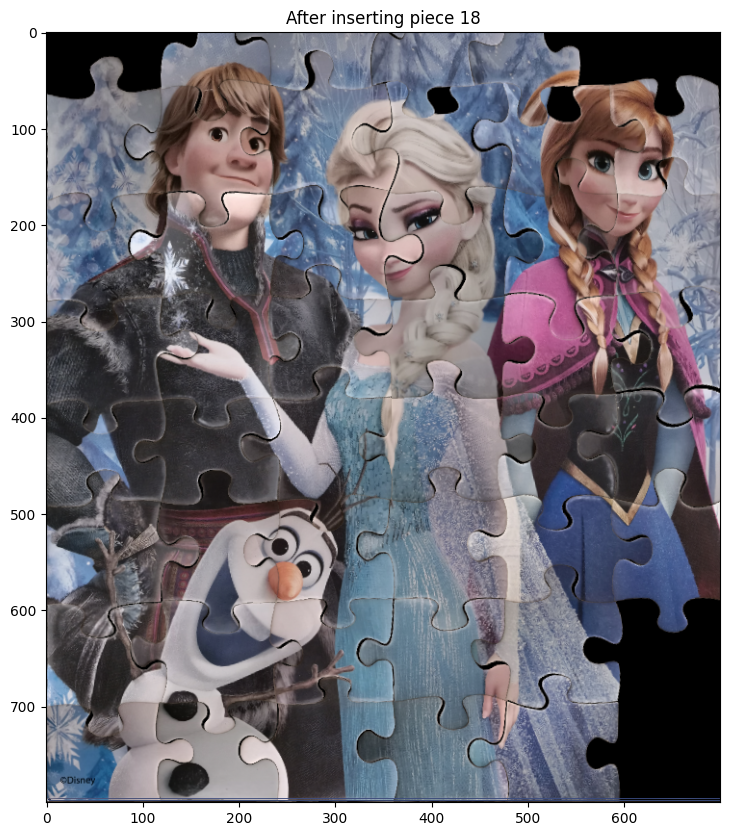

Inserted piece 21


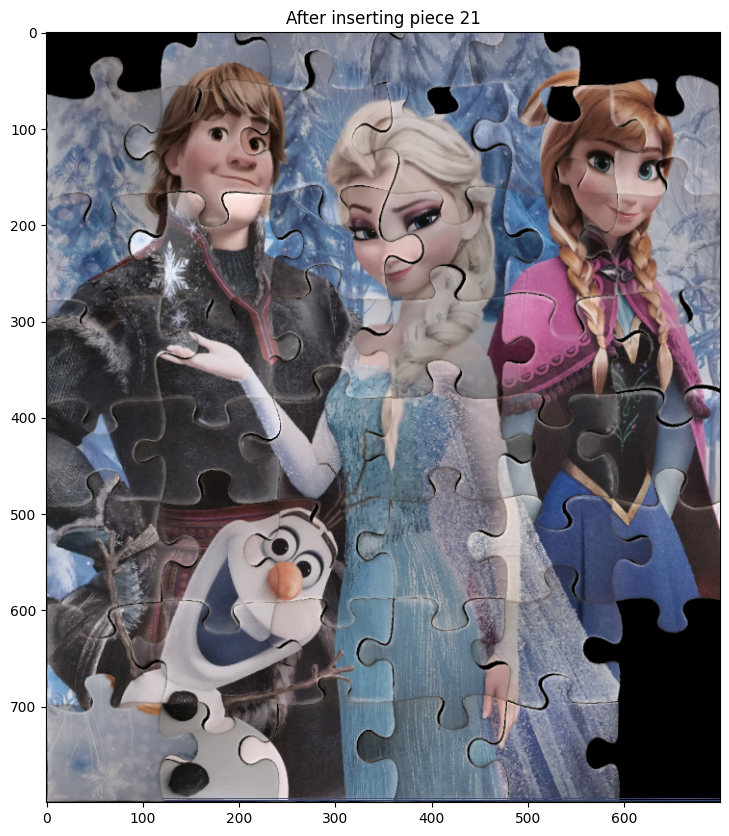

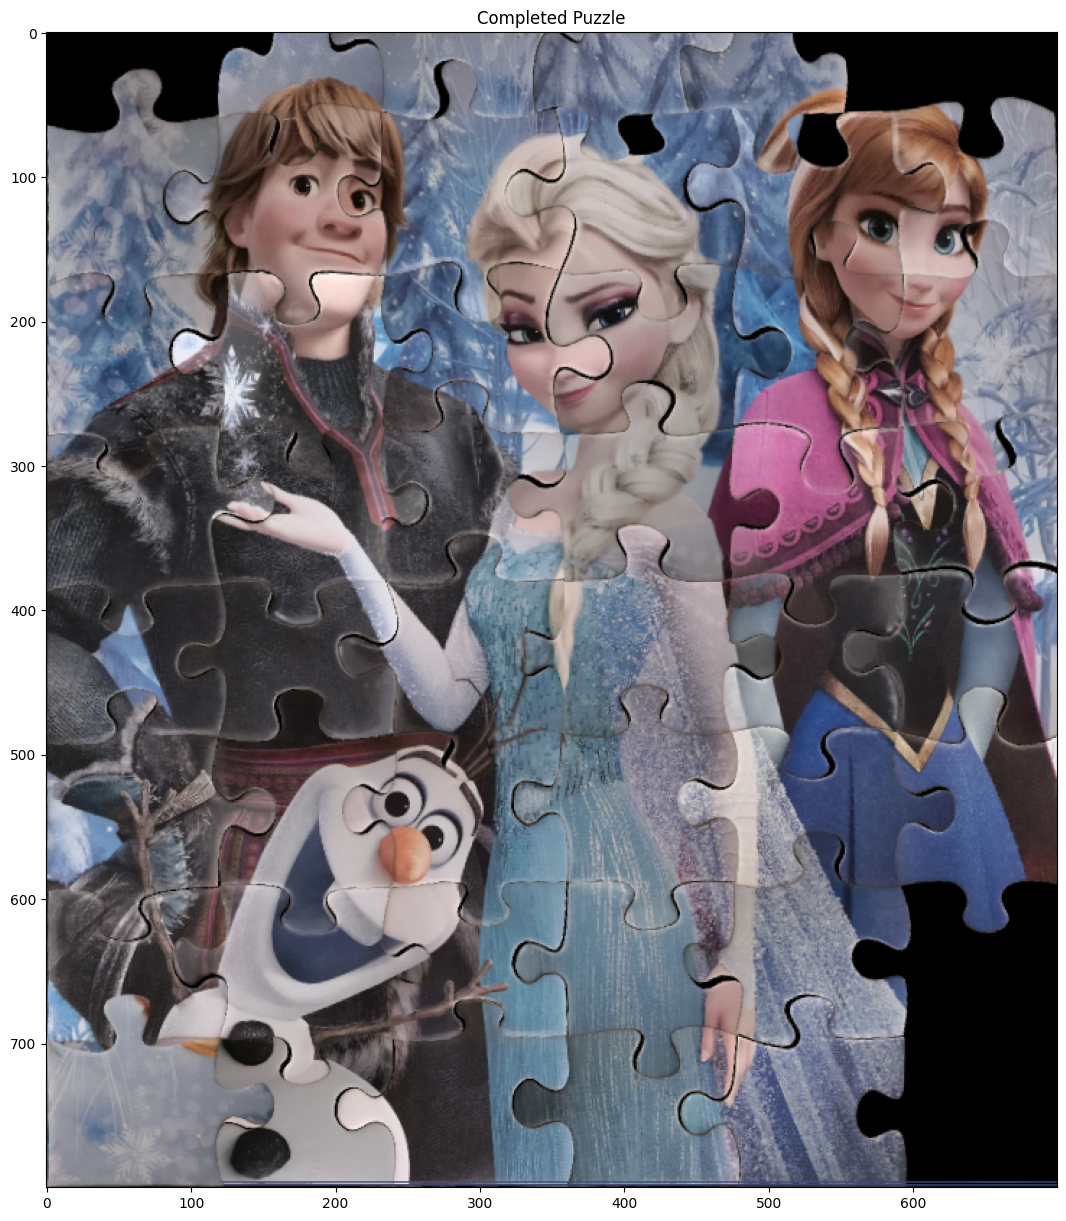


Puzzle assembly completed:
Total pieces: 48
Inserted pieces: 48


In [1]:
from classes import *
import copy
from collections import deque

# Initialize puzzle and get corner piece
puzzle = Puzzle(MATCH_IMGS)
corner_piece = puzzle.pieces[3]  

# Insert corner piece first
corner_piece.insert()

# Initialize BFS queue with connected pieces
queue = deque()  # Using deque for efficient queue operations

for edge in corner_piece.edge_list[:-1]:  
    if not edge.is_flat and edge.connected_edge is not None:
        connected_piece = edge.connected_edge.parent_piece
        if not connected_piece.inserted:
            queue.append(connected_piece)

count = 0 
while queue:
    current_piece = queue.popleft()
    
    if not current_piece.inserted:
        try:
            current_piece.insert()
            
            for edge in current_piece.edge_list[:-1]:  
                if edge.connected_edge is not None:
                    connected_piece = edge.connected_edge.parent_piece
                    if not connected_piece.inserted:
                        queue.append(connected_piece)
                        
            print(f"Inserted piece {current_piece.idx}")
            count +=1
            
            if(count < 6 or count >42):
                plt.figure(figsize=(10, 10))
                plt.imshow(canvas)
                plt.title(f"After inserting piece {current_piece.idx}")
                plt.show()
                plt.close()
            
        except Exception as e:
            print(f"Failed to insert piece {current_piece.idx}: {str(e)}")
            queue.append(current_piece)

plt.figure(figsize=(15, 15))
plt.imshow(canvas)
plt.title("Completed Puzzle")
plt.show()

# Print summary
inserted_count = sum(1 for piece in puzzle.pieces if piece.inserted)
print(f"\nPuzzle assembly completed:")
print(f"Total pieces: {len(puzzle.pieces)}")
print(f"Inserted pieces: {inserted_count}")